In [1]:
#Load libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
#Load Dataset
df=pd.read_csv('./studentperf.csv')
df.head()

,Method,satis,time,ability,prvperf,Outcome
0,1,5,22,13,26.5,1
1,1,4,12,27,19.6,0
2,1,2,22,18,26.4,1
3,1,5,20,18,25.1,0
4,1,4,22,29,28.0,1


In [9]:
# Quick Overview
print("🔍 Dataset Shape:", df.shape)
print(df.dtypes)

🔍 Dataset Shape: (60, 6)
Method       int64
satis        int64
time         int64
ability      int64
prvperf    float64
Outcome      int64
dtype: object


In [ ]:
✅ Step 1: Check for null (luckily there isn't an empty column or row)

In [16]:
print(df.isnull().sum())

Method     0
satis      0
time       0
ability    0
prvperf    0
Outcome    0
dtype: int64


In [18]:
#Key Statistics
df.describe()

,Method,satis,time,ability,prvperf,Outcome
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2.000000,4.966667,18.533333,29.216667,22.796667,0.450000
std,0.823387,1.813010,3.586541,11.295854,3.262367,0.501692
min,1.000000,1.000000,12.000000,7.000000,16.000000,0.000000
25%,1.000000,4.000000,16.000000,22.000000,20.375000,0.000000
50%,2.000000,5.000000,18.000000,29.500000,22.700000,0.000000
75%,3.000000,6.000000,22.000000,37.250000,25.225000,1.000000
max,3.000000,9.000000,26.000000,49.000000,32.800000,1.000000


In [ ]:
✅ Step 2: CHECK FOR KEY STATISTICS   (Give u summarization interpretation of everything u need to know about the dataset)
 
(Method,Statistic and Ability have a high variation/diferrence/gaps of values among themselves in each column 41%,31% & 38%. 
  Variation% calc from C.V=std/mean*100%, sample idea of what i am trying to say for each column data could look like 1,5,25,10,8,55,33)

🔹 0% – 20%	Low variation (Data are tightly clustered)  🔹21% – 40%	Moderate variation   🔹> 40%	High variation (widely spread out; potential outliers )

NOTE;that variation from cluster, moderate to outliers can be observed from EDA/pairplot diagram for better idea of it
NOTE:from my personnal expirence/observation not neccesarrily correct, but sometime noticed that columnn with high variation usually affect some or in
correlation with some other independent variables or dependent variable/columnn, for clearer interpretation or pic of msg is from EDA/heatmap diagram 

                      (I also noticed that there is a high spread/range of value in the column ability cus the min value= 11.29 & max value =49
            meaning number ranges from 11.29 to 49)

          (Since for all dataset in the each column is a Symmetric distribution except Ability Column bcus Q3−Q2=Q2−Q1 
    (75%,50% & 25% of dataset Rep the Quartiles) meaning equal balance of data/value distribution in these column 
therefore Method 3-2=2-1 respectivly and other column to except Ability column. NOTE; in my term i'd say symmetric is when 50% or half of dataset is distributed
 equally and in the same/similar distribution way from 1%-50% and 50%-100%. For example/clearer pic of what the dataset
should look like inform of equals & distribution   (___|___) and this 1,4,7,10,13,16,19.  Also note that some other column dataset ain't exactly 
    symmetric cus is slightly 0.1 or 0.2 above 0, so in most cases considered symmetric but can be controversial

,   Ability 49-29.5=29.5-7 != not 0. Therefore Ability is negatively skew distribution so what dataset might look like (___|____) 
    and this 1,4,7,16,17,19,22). 
       NOTE: that Percent difference of spred of each half in Ability dataset is = 13.3% : by cal % diff= [(Q2 - Q1)- (Q3 - Q2)/(Q2 - Q1)]*100 ≈13.3%
         So, the lower half is 13.3% more spread out than the upper half.

🔹 Symmetric Distribution = Q3−Q2=Q2−Q1      🔹 Positively Skewed (Right-Skewed) = Q3−Q2>Q2−Q1   🔹 Negatively Skewed (Left-Skewed) = Q3−Q2<Q2−Q1

NOTE; That in case of a missing number in a symmetric distribution in part of any column it can be replace with mean/avearge value of it,
     while -VE or +VE is replace with the median value


<Axes: >

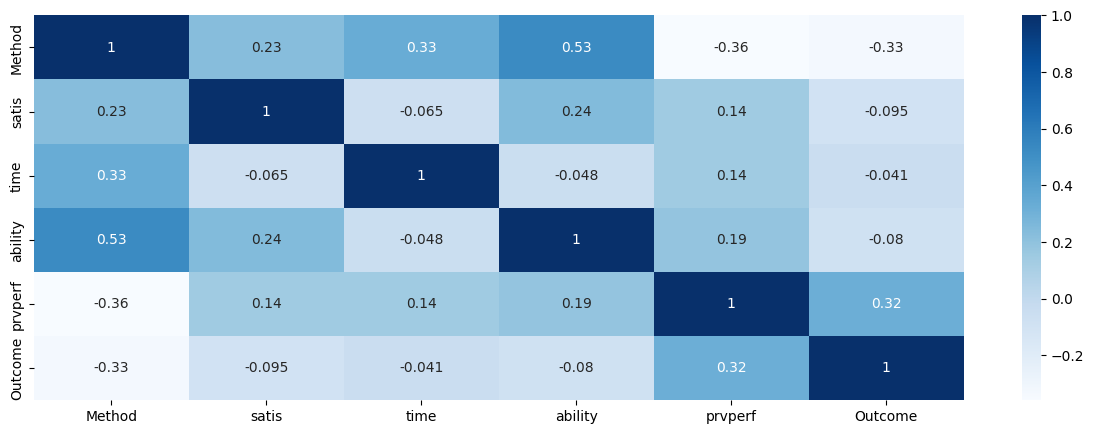

In [10]:
#Visualization of Correlations
fig = plt.figure(figsize=(15,5))
sns.heatmap(studentperf.corr(),annot=True,cmap="Blues")

In [ ]:
✅ Step 3: CHECK FOR FEATURES CORRELATIONS (Helps to show the correlation/relationship effect of one or more features/columns to another)

(As we all can see from the correlation heatmap that Method is 0.53 in correlation with the Ability, which is considered average effect or 53% 
chances that as method at which the student are being taught increases the Ability of the student also increases, Naturally we know that anyones 
with good or +ve ability will surely influence their performance)

(We can also see that the correlation btw Method and Outcome of the student is -0.33 or -33%, meaning that as the method drops down or decreases
the outcome or result of the student of decreases/lower)

(Method is in correllation with the Time by 0.33, meaning as the method at which student are being taught increases the time of study 
for student increases. so the chances of that effect is 33% of the time)

(Also the chance for the Prvperf(previous performance) of the student to affect their current outcome/result is 0.32 or 32%) 


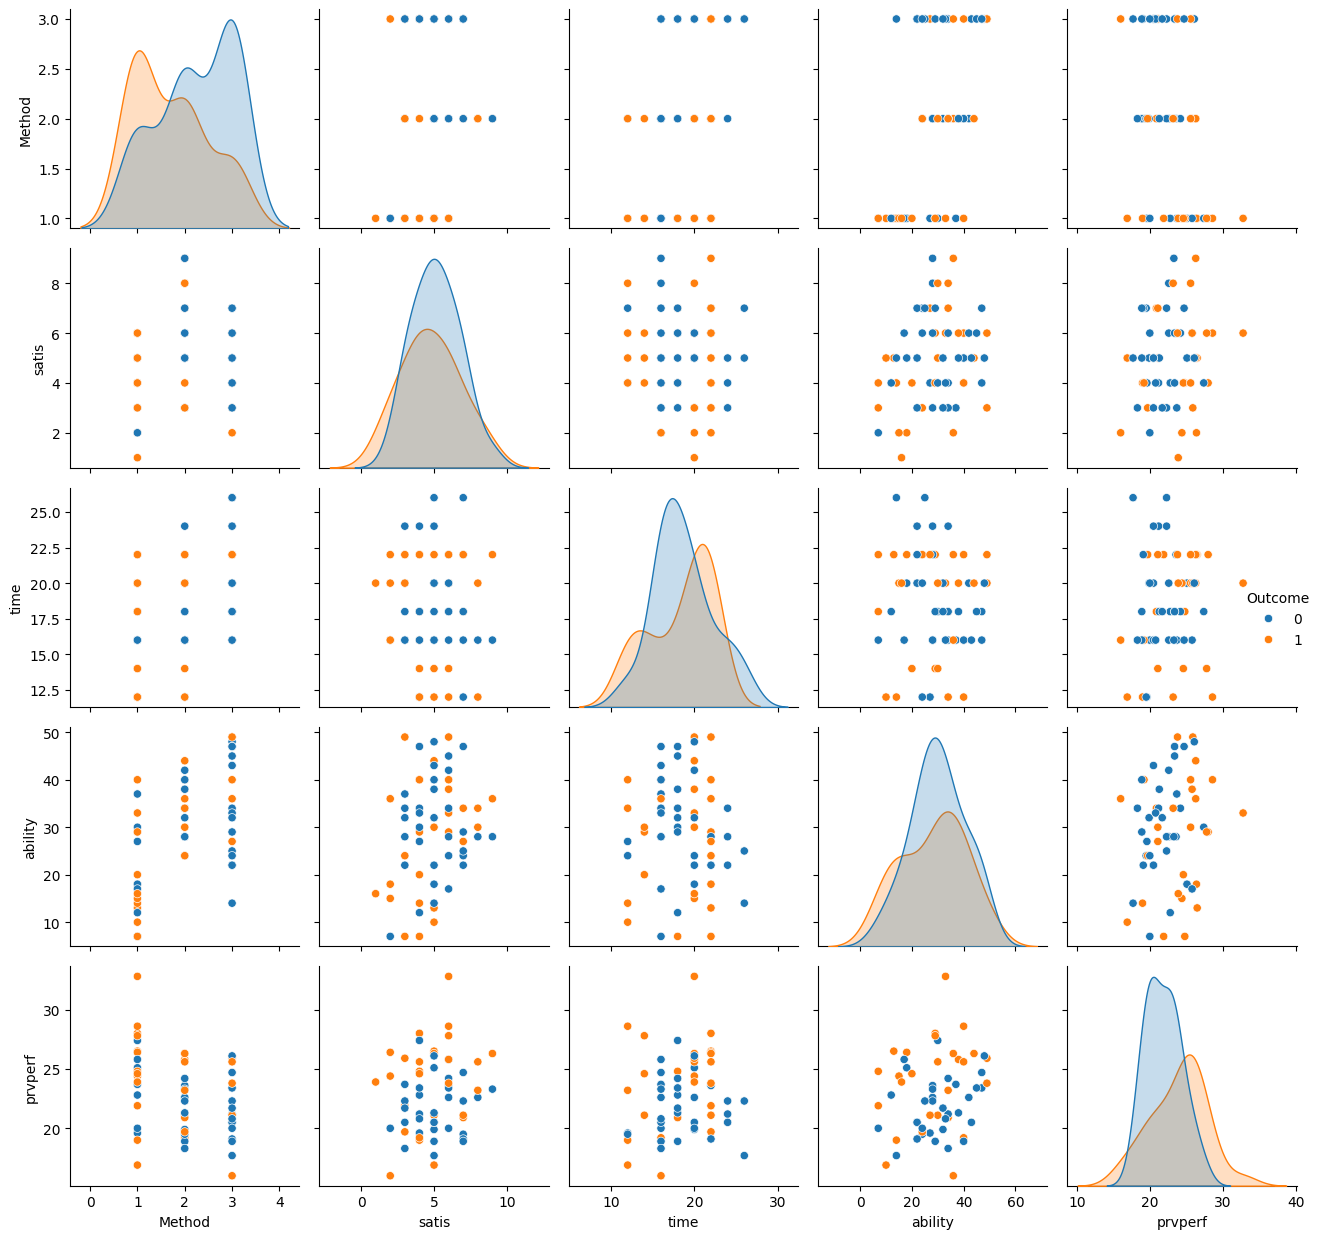

In [11]:
# Pairplot with hue=species
sns.pairplot(studentperf, hue='Outcome')
plt.tight_layout()
plt.show()

In [ ]:
✅ Step 4: SCATTER PLOT RELATIONSHIP FEATURES ( To check the pattern, distance or structure relationship of feature)

Note; basicly to check how scattered or distance of the data in each features from one point to another, very in relationship with variation 
as explained above ealier key statistic
(from the scatter plot above we can tell that Method, Satis and Time have quite some outlier for most part, while Ability and 
Prvperf data are cluster or tightly packed together)

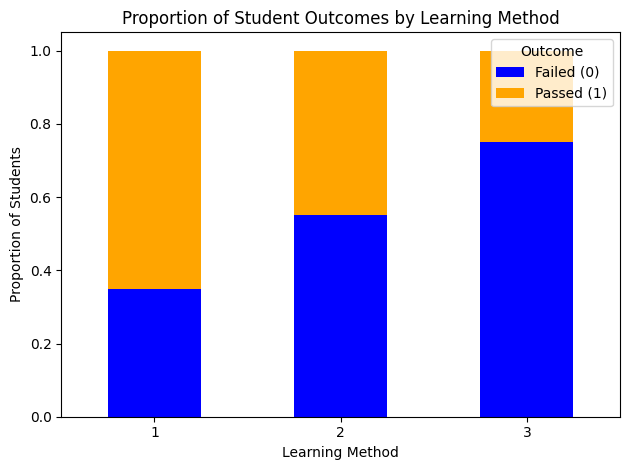

In [9]:
# Create a proportional bar chart
method_outcome = pd.crosstab(studentperf['Method'], studentperf['Outcome'], normalize='index')
method_outcome.plot(kind='bar', stacked=True, color=['blue', 'orange'])

plt.title("Proportion of Student Outcomes by Learning Method")
plt.xlabel("Learning Method")
plt.ylabel("Proportion of Students")
plt.legend(title="Outcome", labels=["Failed (0)", "Passed (1)"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
✅ Step 5: CHECK FOR PROPORTIONAL DISTRIBUTION ( To check the effect/impact of each pair of data in a Categorie/class)

(Since i am aware from my heatmap that the Method at which the student are being taught is highly significant to what we can achieve
so we decide to do a proportional barchart distribution to determine what method is good, fair or bad. Blue Rep fail & Orange Rep Pass from barchart)

(Note from the barchart we can tell Method 1 as 65% on the success rate of the student to pass and 35% to fail, which is more effective for success)

(Note from the barchart we can tell Method 2 as 45% on the success rate of the student to pass and 55% to fail, which is less effective for success/pass)

(Note from the barchart we can tell Method 3 as 25% on the success rate of the student to pass and 75% to fail, which is very poor for success/better outcome)


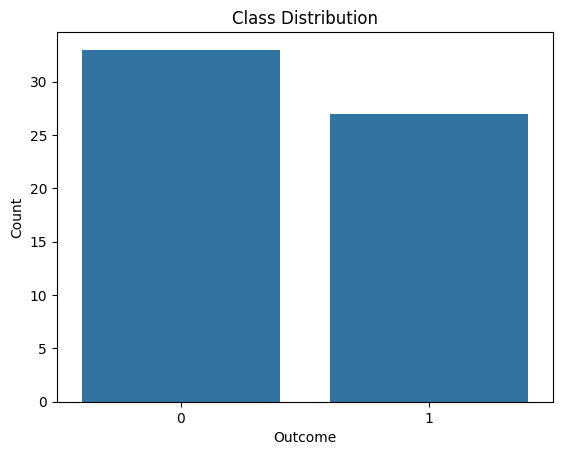

In [6]:
# Define target column
y = df["Outcome"]

# Optional: Visualize the class distribution
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

In [ ]:
✅ Step 6: CHECK FOR CLASS IMBALANCE/DISTRIBUTION (It's Important to check for class Imbalance for Dependent Variable)
                                                  
(Check for class Imbalance for independent Variable having a categorie dataset is good to enabling fair balance of dataset 
and model accuracy while building any categorical model)
                                                  
(luckily we have a fair amount of balance 0=34 or 56.7% and 1= 26 or 43.3% of dependent variable so no need 
for smoote for better class/balance distribution to enhance good model accuracy/prediction)

In [7]:
import pandas as pd

# Create x and y variables
x = df.drop('Outcome', axis=1).to_numpy()
y = df['Outcome'].to_numpy()


In [ ]:
✅ Step 7: You need to separate features and labels to train a supervised machine learning model (Before you can train your
                             model u need to define which one is the independedent (x) and dependent variable (y) ) 

In [8]:
#Create Training and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.2,random_state=100)

In [ ]:
✅ Step 8: Here I use 80% to training the dataset and 20% to test the dataset 

(I use 80% of the data to teach the model — this is called the training set. The model learns patterns and relationships from this part.)

( I use the remaining 20% to test the model — this is called the test set. It helps us see how well the model can predict results for new data,
even if some values in the target column are missing. This shows whether the model truly learned the patterns & how well it predict this missing values.)

Note: It's like a student using 80% of their time to study for a math exam and 20% to actually take the test. The exam score shows how well 
the student understood the topic — not just memorized it. Similarly, the model’s accuracy on the test data tells us if we can trust it to handle 
new questions on the same topic.



In [9]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [10]:
#Script for SVM and NB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('SVM', SVC(random_state=100)),
                    ('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['1','0']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))  


Estimator: SVM
[[5 2]
 [2 3]]
              precision    recall  f1-score   support

           1       0.71      0.71      0.71         7
           0       0.60      0.60      0.60         5

    accuracy                           0.67        12
   macro avg       0.66      0.66      0.66        12
weighted avg       0.67      0.67      0.67        12


Estimator: Naive Bayes
[[5 2]
 [3 2]]
              precision    recall  f1-score   support

           1       0.62      0.71      0.67         7
           0       0.50      0.40      0.44         5

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.57      0.58      0.57        12



In [ ]:
# Model 1
Estimator: SVM
[[5 2]
 [2 3]]
For the SVM model, out of 7 students who passed, it correctly identified 5 and misclassified 2(not sure if fail or pass). 
Out of 5 students who failed,it correctly identified 2 and misclassified 3. This result in an overall accuracy of 0.67 = 67%,
meaning the model correctly predicts pass or fail is 67% chance

Model 2
Estimator: Naive Bayes
[[5 2]
 [3 2]]
For the Naive Bayes model, out of 7 students who passed, it correctly identified 2 and misclassified 5. Out of 5 students who failed, it 
correctly identified 5 and misclassified none. This results in an overall accuracy of 58%, meaning for the model gets the outcome is 58% chances

Models Conclusion:
Between the two, SVM is the more reliable model based on accuracy and balanced performance. But for higher reliability, aim for accuracy 
 above 70% andcheck other metrics depending on your goal (e.g., avoiding false fails), need for model improvement.   



In [ ]:
🎯 Business Insights: Student Performance Analysis
✅ Key Drivers of Student Success & Recommendations to Improve Pass Rate
Teaching Method Matters
•	Method 1 shows a 65% pass rate — clearly the most effective.
•	Method 3 shows only 25% pass rate, with 75% failing — a serious concern.
Recommendation: Standardize or expand Method 1 across classes. Discontinue or revise Method 3.
Ability Strongly Impacts Outcome
•	High variation and a negative skew in the "Ability" column suggest many students are struggling at lower ability levels.
•	Correlation with Outcome is moderate (53%), meaning better ability leads to better results.
Recommendation: Implement early ability assessment and personalized learning plans. Provide targeted support to low-ability students.
Time and Method Are Linked
•	A 33% positive correlation between time spent studying and teaching method suggests better methods encourage more study time.
Recommendation: Encourage teaching methods that actively engage students and increase study hours through structured schedules or incentives.
Past Performance Predicts Future Results
•	Previous performance correlates with current outcome at 32%.
Recommendation: Identify students with a history of poor performance and intervene early with extra tutoring or mentoring.


🚫 What to Avoid
Method 3 Should Be Reassessed or Replaced
•	It leads to the highest failure rate.
•	Students under this method may need urgent attention or reallocation.
Skewed Ability Distribution
•	Many students are clustered at the lower end of ability (min = 11.29 vs. max = 49).
•	Focus resources on foundational skills to raise the overall ability baseline
•	Don’t treat all students the same , data shows performance varies significantly

✅ Final Note to Stakeholders
With focused changes particularly in teaching method, study time, personalized support, and early interventions, the student success rate can be significantly improved. Data shows clear patterns. Act on them. Invest where the impact is proven. Drop what's not working.
